# 0 - Install packages

In [ ]:
!pip install nnetsauce --upgrade --no-cache-dir

A Random Vector Functional Link (RVFL) artificial _neural_ network with 2 regularization parameters has been successfully for forecasting in professional settings (available soon for an increased flexibility in [https://www.techtonique.net/](https://www.techtonique.net/) and Microsoft Excel, stay tuned):

- Introduced in _Multiple Time Series Forecasting Using Quasi-Randomized Functional Link Neural Networks_: [https://www.mdpi.com/2227-9091/6/1/22](https://www.mdpi.com/2227-9091/6/1/22)
- [https://www.ressources-actuarielles.net/EXT/ISFA/fp-isfa.nsf/0/0b9df464e9543283c1256f130067b2f9/$FILE/GSE_RVFL_LAL.pdf](https://www.ressources-actuarielles.net/EXT/ISFA/fp-isfa.nsf/0/0b9df464e9543283c1256f130067b2f9/$FILE/GSE_RVFL_LAL.pdf)
- [https://journee-iard-2023.institutdesactuaires.com/global/gene/link.php?doc_id=19376&fg=1](https://journee-iard-2023.institutdesactuaires.com/global/gene/link.php?doc_id=19376&fg=1)
- [https://www.institutdesactuaires.com/docs/mem/ed9acfdd661fe96f70d1078f2b70bade.pdf](https://www.institutdesactuaires.com/docs/mem/ed9acfdd661fe96f70d1078f2b70bade.pdf)
- [https://www.ressources-actuarielles.net/EXT/ISFA/1226-02.nsf/d512ad5b22d73cc1c1257052003f1aed/957f021200c51ba5c1258c340023c8da/$FILE/m%C3%A9moire_ia_pt_diallo.pdf](https://www.ressources-actuarielles.net/EXT/ISFA/1226-02.nsf/d512ad5b22d73cc1c1257052003f1aed/957f021200c51ba5c1258c340023c8da/$FILE/m%C3%A9moire_ia_pt_diallo.pdf)

All the implementations cited in these works were done in R, but this post considers various python implementations/adaptations/flavors of the model, with potentially increased model capacity (and regularization parameters). The models used here as workhorses for Multivariate Time Series are described in [https://www.researchgate.net/publication/339512391_Quasi-randomized_networks_for_regression_and_classification_with_two_shrinkage_parameters](https://www.researchgate.net/publication/339512391_Quasi-randomized_networks_for_regression_and_classification_with_two_shrinkage_parameters) (could be tuned further these days, I guess).


It's worth mentioning that these models are amenable to backpropagation (see [https://thierrymoudiki.github.io/blog/2025/06/24/r/backprop-qrnn-r-version](https://thierrymoudiki.github.io/blog/2025/06/24/r/backprop-qrnn-r-version) and [https://thierrymoudiki.github.io/blog/2025/06/23/python/backprop-qrnn](https://thierrymoudiki.github.io/blog/2025/06/23/python/backprop-qrnn), although slower in this setting), but there's no evidence that backpropagating would lead to a _better_ model.

# 1 - Get data set

In [36]:
import pandas as pd

url = "https://raw.githubusercontent.com/Techtonique/"
url += "datasets/main/time_series/multivariate/"
url += "ice_cream_vs_heater.csv"

df_temp = pd.read_csv(url)
df_temp.index = pd.DatetimeIndex(df_temp.date) # must have# first other difference
df_icecream = df_temp.drop(columns=['date']).diff().dropna()

,heater,icecream
count,197.00,197.00
mean,-0.02,0.31
std,5.78,7.73
min,-23.00,-32.00
25%,-2.00,-3.00
50%,0.00,1.00
75%,3.00,5.00
max,19.00,20.00


<Axes: xlabel='date'>

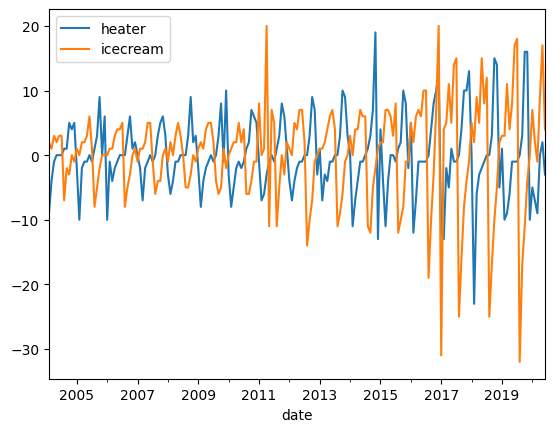

In [37]:
display(df_icecream.describe())
df_icecream.plot()

# 2 - Use BayesianRVFL2Regressor as a workhorse (fully Bayesian approach)

Remember to tune the model's hyperparameters, for example by using [https://thierrymoudiki.github.io/blog/2024/12/09/python/bayesconfoptim](https://thierrymoudiki.github.io/blog/2024/12/09/python/bayesconfoptim).

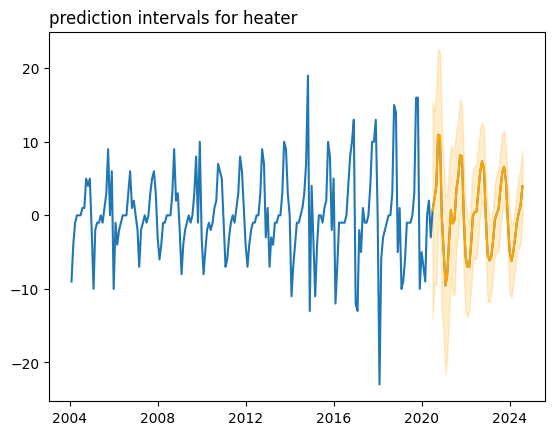

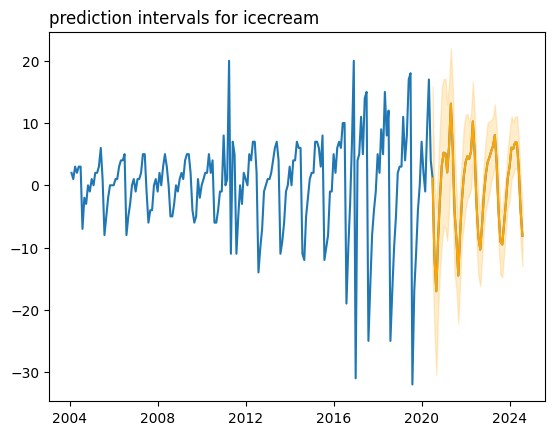

In [38]:
import nnetsauce as ns

regr = ns.MTS(obj=ns.BayesianRVFL2Regressor(s1=1, s2=100, dropout=0.1, sigma=15),
              n_hidden_features=5, lags=20, show_progress=False, verbose=False)
regr.fit(df_icecream) # fit the model
regr.predict(h=50, return_std=True)
regr.plot("heater", type_plot="pi")
regr.plot("icecream", type_plot="pi")

# 3 - Use `Ridge2Regressor` as a workhorse (frequential --> conformal prediction)

Remember to tune the model's hyperparameters, for example by using [https://thierrymoudiki.github.io/blog/2024/12/09/python/bayesconfoptim](https://thierrymoudiki.github.io/blog/2024/12/09/python/bayesconfoptim).

100%|██████████| 2/2 [00:00<00:00, 15.94it/s]


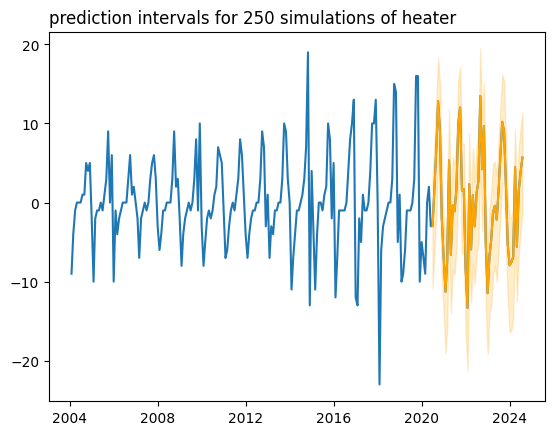

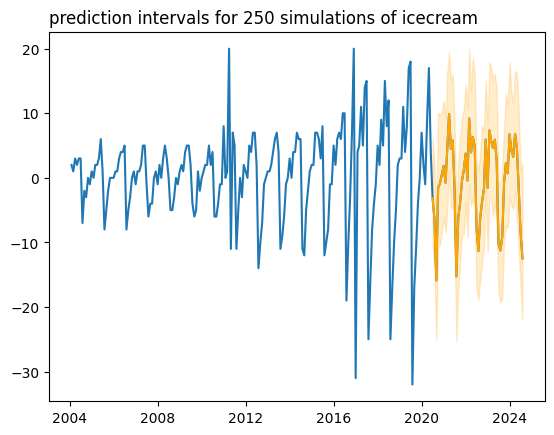

In [40]:
regr = ns.MTS(obj=ns.Ridge2Regressor(lambda1=0.01, lambda2=1000, n_hidden_features=5),
              lags=10, n_hidden_features=10, replications=250, type_pi="scp2-kde")
regr.fit(df_icecream) # fit the model
regr.predict(h=50)
regr.plot("heater", type_plot="pi")
regr.plot("icecream", type_plot="pi")

# 4 - Using R port

This is the original R implementation, but in Python.

In [ ]:
!pip install ahead --verbose

In [ ]:
import os
import numpy as np
import pandas as pd
from ahead import Ridge2Regressor
from time import time


In [56]:
# Forecasting horizon
h = 50

# univariate ts forecasting
print("Example 1 -----")
obj_MTS = Ridge2Regressor(h = h, lags=20, date_formatting = "original")

start = time()
obj_MTS.forecast(df_icecream)
print("Elapsed", time()-start)

Example 1 -----
Elapsed 0.03411126136779785


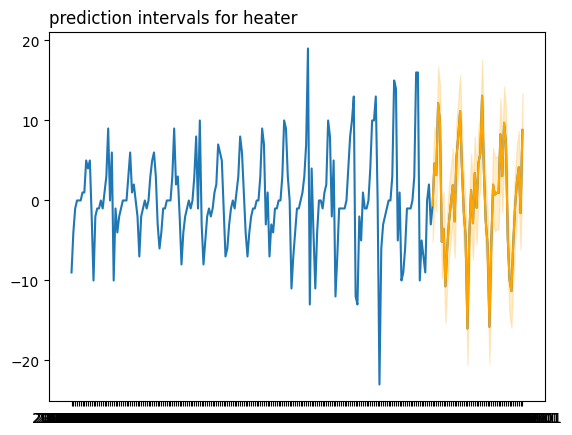

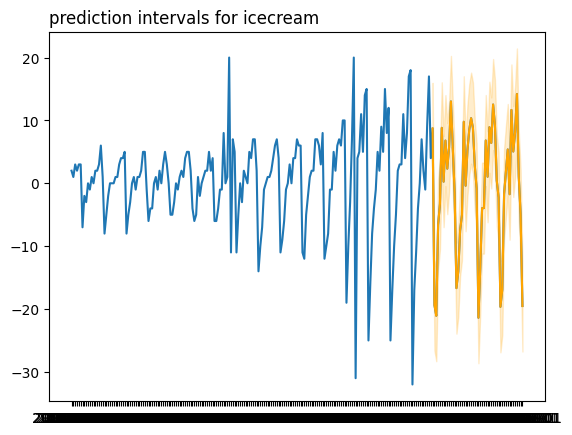

In [57]:
d1.plot("heater")
d1.plot("icecream")